# Insper - Modelagem e Simulação do Mundo Físico

### Simulção um livro deslizando sobre uma tábua

----
## Bibliotecas

In [194]:
#Importa bibliotecas necessárias
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from math import *

----
## Parâmetros do Modelo

In [195]:
# Dimensõe(s) (m)
c = 0.22                    # Livro (comprimento)
l = 0.15                    # Livro (largura)
h = 0.03                    # Livro (altura)

# Área(s) (m²)
As = l*h                    # Livro (area de contato contra o ar)

# Densidade(s) (kg/m³)
rhoa = 1                    # Ar

# Massa(s) (kg)
m = 0.45                    # Livro

# Gravidade (m/s²)
g = 9.81                    # Terra

# Coeficiente de arrasto
Cd = 1.05                   # Da área 'As'

# Ângulo limite (°)
angle_l = 13.2              # Tábua

# μ cinético (coeficiente de atrito cinético)
mic = tan(radians(angle_l)) # Entre livro e tábua

----
## 1° Iteração

In [196]:
# modelo com arrasto
def modelo1 (X, t, angle):
    
    rang = radians(angle)

    x = X[0]
    y = X[1]
    vx = X[2]
    vy = X[3]
    
    Nx = m*g*cos(rang)*sin(rang)
    Ny = m*g*cos(rang)**2
    Fatx = mic*m*g*cos(rang)**2
    Faty = mic*m*g*cos(rang)*sin(rang)
    Farx = (1/2)*rhoa*Cd*As*(vx**2 + vy**2)*cos(rang)
    Fary = (1/2)*rhoa*Cd*As*(vx**2 + vy**2)*sin(rang)
    
    dxdt = vx
    dydt = vy
    dvxdt = (Nx - Fatx - Farx)/m
    dvydt = ((+Ny + Faty + Fary)/m) - g
    
    if angle < angle_l:
        return [0, 0, 0, 0]
    elif y < 0:
        # return [0, 0, 0, 0]
        return [exp(10e4*y)*dydt, exp(10e4*y)*dydt, exp(10e4*y)*dydt, exp(10e4*y)*dydt]
    else:
        return [dxdt, dydt, dvxdt, dvydt]

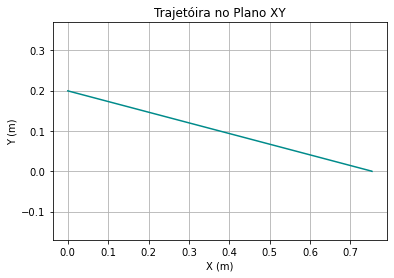

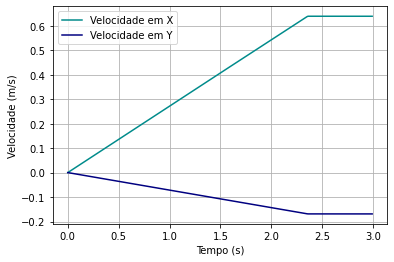

In [197]:
L_t = np.arange(0, 3, 0.01)

# Condições iniciais
angle = 14.8
x0 = [0, 0.78*sin(radians(angle)), 0, 0]

# Resolução numérica
r1 = odeint(modelo1, x0, L_t, args = (angle,))
L_x1 = r1[:,0]
L_y1 = r1[:,1]
L_vx1 = r1[:,2]
L_vy1 = r1[:,3]

# Trajetória no plano XY
planoXY1, ax = plt.subplots()
plt.plot(L_x1, L_y1, 'darkcyan')
plt.axis('equal')
plt.title('Trajetóira no Plano XY')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.grid(True)
plt.show()
planoXY1.savefig('1.planoXY1.png',  format = 'png', dpi = 1080)

# Velocidade
velocidade1, ax = plt.subplots()
plt.plot(L_t, L_vx1, 'darkcyan', label = 'Velocidade em X')
plt.plot(L_t, L_vy1, 'navy', label = 'Velocidade em Y')
plt.legend()
plt.title('')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (m/s)')
plt.grid(True)
plt.show()
velocidade1.savefig('2.velocidade1.png',  format = 'png', dpi = 1080)

----
## Gráficos para apresentação
#### Como seria sem o arrasto?

In [198]:
# Modelo sem Arrasto
def modelo2 (X, t, angle):
    
    rang = radians(angle)

    x = X[0]
    y = X[1]
    vx = X[2]
    vy = X[3]
    
    Nx = g*cos(rang)*sin(rang)
    Ny = g*cos(rang)**2
    Fatx = mic*g*cos(rang)**2
    Faty = mic*g*cos(rang)*sin(rang)
    
    dxdt = vx
    dydt = vy
    dvxdt = Nx - Fatx
    dvydt = Ny + Faty - g
    
    if angle < angle_l:
        return [0, 0, 0, 0]
    elif y < 0:
        return [0, 0, 0, 0]
    else:
        return [dxdt, dydt, dvxdt, dvydt]



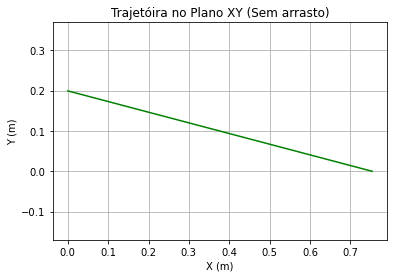

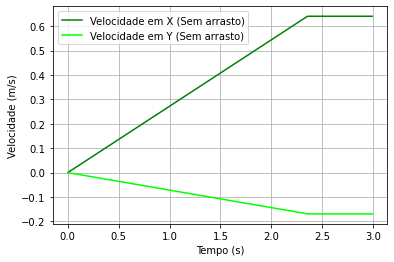

In [199]:
# Resolução numérica
r2 = odeint(modelo2, x0, L_t, args = (angle,))
L_x2 = r2[:,0]
L_y2 = r2[:,1]
L_vx2 = r2[:,2]
L_vy2 = r2[:,3]

# Trajetória no plano XY
planoXY2, ax = plt.subplots()
plt.plot(L_x2, L_y2, 'g')
plt.axis('equal')
plt.title('Trajetóira no Plano XY (Sem arrasto)')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.grid(True)
plt.show()
planoXY2.savefig('3.planoXY2.png',  format = 'png', dpi = 1080)

# Velocidade
velocidade2, ax = plt.subplots()
plt.plot(L_t, L_vx2, 'g', label = 'Velocidade em X (Sem arrasto)')
plt.plot(L_t, L_vy2, 'lime', label = 'Velocidade em Y (Sem arrasto)')
plt.legend()
plt.title('')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (m/s)')
plt.grid(True)
plt.show()
velocidade2.savefig('4.velocidade2.png',  format = 'png', dpi = 1080)

## Comparação entre modelo1 e modelo2

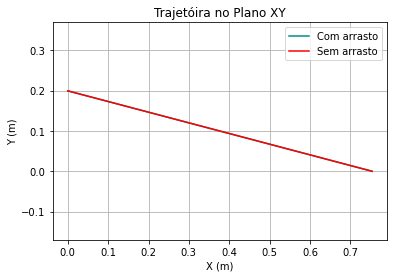

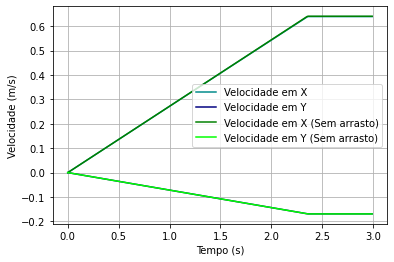

In [200]:
# Trajetória no plano XY
comparaçãoXY, ax = plt.subplots()
plt.plot(L_x1, L_y1, 'darkcyan', label = 'Com arrasto')
plt.plot(L_x2, L_y2, 'r', label = 'Sem arrasto')
plt.axis('equal')
plt.legend()
plt.title('Trajetóira no Plano XY')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.grid(True)
plt.show()
comparaçãoXY.savefig('5.comparaçãoXY.png',  format = 'png', dpi = 1080)

# Velocidade
comparaçãov, ax = plt.subplots()
plt.plot(L_t, L_vx1, 'darkcyan', label = 'Velocidade em X')
plt.plot(L_t, L_vy1, 'navy', label = 'Velocidade em Y')
plt.plot(L_t, L_vx2, 'g', label = 'Velocidade em X (Sem arrasto)')
plt.plot(L_t, L_vy2, 'lime', label = 'Velocidade em Y (Sem arrasto)')
plt.legend()
plt.title('')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (m/s)')
plt.grid(True)
plt.show()
comparaçãov.savefig('6.comparaçãov.png',  format = 'png', dpi = 1080)

----
## Gráfico Comclusivo

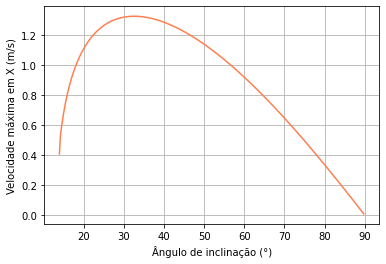

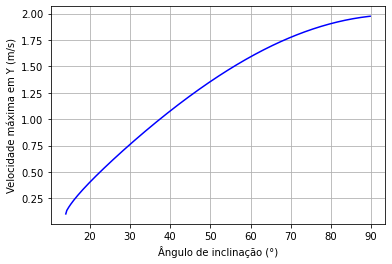

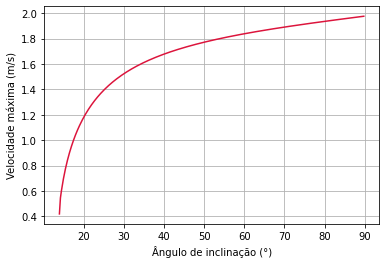

In [201]:
L_ang_ini = np.arange(14, 90, 0.25)
L_vxmax = []
L_vymax = []
L_vmax = []

for ang in L_ang_ini:
    rc = odeint(modelo1, x0, L_t, args=(ang,))

    L_vxc = rc[:,2]
    L_vyc = rc[:,3]

    vxmax = max(L_vxc)
    vymax = -min(L_vyc)
    vmax = sqrt(vxmax**2 + vymax**2)

    L_vxmax.append(vxmax)
    L_vymax.append(vymax)
    L_vmax.append(vmax)


# Velocidade em X
vmaxX, ax = plt.subplots()
plt.plot(L_ang_ini, L_vxmax, 'coral')
plt.title('')
plt.xlabel('Ângulo de inclinação (°)')
plt.ylabel('Velocidade máxima em X (m/s)')
plt.grid(True)
plt.show()
vmaxX.savefig('7.vmaxX.png',  format = 'png', dpi = 1080)

# Velocidade em Y
vmaxY, ax = plt.subplots()
plt.plot(L_ang_ini, L_vymax, 'b')
plt.title('')
plt.xlabel('Ângulo de inclinação (°)')
plt.ylabel('Velocidade máxima em Y (m/s)')
plt.grid(True)
plt.show()
vmaxY.savefig('8.vmaxY.png',  format = 'png', dpi = 1080)

# Velocidade
vmax, ax = plt.subplots()
plt.plot(L_ang_ini, L_vmax, 'crimson')
plt.title('')
plt.xlabel('Ângulo de inclinação (°)')
plt.ylabel('Velocidade máxima (m/s)')
plt.grid(True)
plt.show()
vmax.savefig('9.vmax.png',  format = 'png', dpi = 1080)